In [1]:
import numpy as np 
import pandas as pd 
import os
import gc
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


AUTOTUNE = tf.data.experimental.AUTOTUNE

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
TRAIN_PATH = '../input/aptos2019-blindness-detection/train_images/'
DF_TRAIN = pd.read_csv('../input/aptos2019-blindness-detection/train.csv', dtype='str')
DF_TRAIN['image_path'] = TRAIN_PATH + "/" + DF_TRAIN["id_code"] + ".png"
 
DF_TRAIN.head()

,id_code,diagnosis,image_path
0,000c1434d8d7,2,../input/aptos2019-blindness-detection/train_i...
1,001639a390f0,4,../input/aptos2019-blindness-detection/train_i...
2,0024cdab0c1e,1,../input/aptos2019-blindness-detection/train_i...
3,002c21358ce6,0,../input/aptos2019-blindness-detection/train_i...
4,005b95c28852,0,../input/aptos2019-blindness-detection/train_i...


In [3]:
DF_TRAIN['image_path'][0]

'../input/aptos2019-blindness-detection/train_images//000c1434d8d7.png'

In [4]:
'../input/aptos2019-blindness-detection/train_images/000c1434d8d7.png'.split('/')[-1]

'000c1434d8d7.png'

In [5]:
classes = {0 : "No DR",
           1 : "Mild",
           2 : "Moderate",
           3 : "Severe",
           4 : "Proliferative"}

In [6]:
TRAIN_PATH_RS = '../input/aptos2019-blindness-detection/train_images/'
DF_TRAIN_RS = pd.read_csv('../input/aptos2019-blindness-detection/train.csv', dtype='str')
DF_TRAIN_RS['image_path'] = TRAIN_PATH_RS +"/"+ DF_TRAIN_RS["id_code"] + ".png" 
DF_TRAIN_RS.head()

,id_code,diagnosis,image_path
0,000c1434d8d7,2,../input/aptos2019-blindness-detection/train_i...
1,001639a390f0,4,../input/aptos2019-blindness-detection/train_i...
2,0024cdab0c1e,1,../input/aptos2019-blindness-detection/train_i...
3,002c21358ce6,0,../input/aptos2019-blindness-detection/train_i...
4,005b95c28852,0,../input/aptos2019-blindness-detection/train_i...


In [7]:
#Source: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [8]:
res = encode_and_bind(DF_TRAIN_RS, 'diagnosis')

In [9]:
res.head()

,id_code,image_path,diagnosis_0,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4
0,000c1434d8d7,../input/aptos2019-blindness-detection/train_i...,False,False,True,False,False
1,001639a390f0,../input/aptos2019-blindness-detection/train_i...,False,False,False,False,True
2,0024cdab0c1e,../input/aptos2019-blindness-detection/train_i...,False,True,False,False,False
3,002c21358ce6,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
4,005b95c28852,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False


In [10]:
classes = {"diagnosis_0" : "No DR",
           "diagnosis_1" : "Mild",
           "diagnosis_2" : "Moderate",
           "diagnosis_3" : "Severe",
           "diagnosis_4" : "Proliferative"}

In [11]:
res.rename(columns=classes, inplace=True)
res.head()

,id_code,image_path,No DR,Mild,Moderate,Severe,Proliferative
0,000c1434d8d7,../input/aptos2019-blindness-detection/train_i...,False,False,True,False,False
1,001639a390f0,../input/aptos2019-blindness-detection/train_i...,False,False,False,False,True
2,0024cdab0c1e,../input/aptos2019-blindness-detection/train_i...,False,True,False,False,False
3,002c21358ce6,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
4,005b95c28852,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False


In [12]:
res.columns

Index(['id_code', 'image_path', 'No DR', 'Mild', 'Moderate', 'Severe',
       'Proliferative'],
      dtype='object')

In [13]:
target = np.array(res[['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']])

In [14]:
num_classes = 5
input_shape = (32, 32, 3)

(-0.5, 3215.5, 2135.5, -0.5)

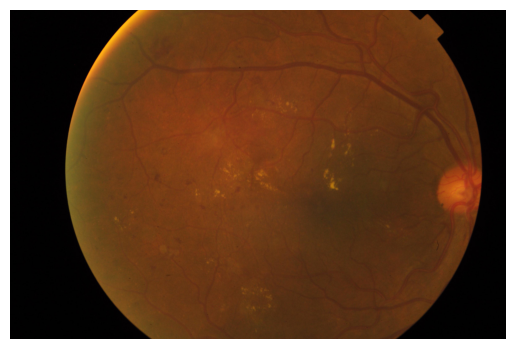

In [15]:
from PIL import Image
image_path = Image.open('../input/aptos2019-blindness-detection/train_images/000c1434d8d7.png')
plt.imshow(image_path)
plt.axis("off")

In [16]:
# Load and preprocess the data
(x_train, x_test, y_train, y_test) = train_test_split(DF_TRAIN['image_path'], DF_TRAIN['diagnosis'], test_size=0.33, random_state=42)

# Convert labels to integers (assuming 'diagnosis' is a column in your DataFrame)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (2453,) - y_train shape: (2453, 5)
x_test shape: (1209,) - y_test shape: (1209, 5)


In [17]:
positional_emb = True
conv_layers = 2
projection_dim = 128

num_heads = 2
transformer_units = [
    projection_dim,
    projection_dim,
]
transformer_layers = 2
stochastic_depth_rate = 0.1

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 100
image_size = 32
patch_size = 3
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4


In [18]:
num_patches

100

In [19]:
@tf.function
def load_and_preprocess(image_file, target):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image, (image_size, image_size))  # Resize images to a common size
    image = tf.cast(image, tf.uint8)
    return image, target

train_loader = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
    .shuffle(7)
    .batch(batch_size)
)

test_loader = (
    tf.data.Dataset
    .from_tensor_slices((x_test, y_test))
    .map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
    .shuffle(7)
    .batch(batch_size)
)


In [20]:
import tensorflow as tf

# Define the load function
@tf.function
def load(image_file, target):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image)
    image = tf.cast(image, tf.uint8)
    return image, target

# Create the train_batch dataset
train_batch = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .map(load, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(7)
    .batch(x_train.shape[0] - 100)  # Adjust batch size as needed
)


In [21]:
train_batch = (
    tf.data.Dataset
    .from_tensor_slices((x_train,y_train))
    .map(load, num_parallel_calls=AUTOTUNE)
    .shuffle(7)
    .batch(x_train.shape[0]-100)#X_train.shape[0]-100
)
#next(iter(train_batch))[0].shape

In [22]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size
        
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        #print(patches.shape)
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

(1, 32, 32, 3)
Image size: 32 X 32
Patch size: 3 X 3
Patches per image: 100
Elements per patch: 27


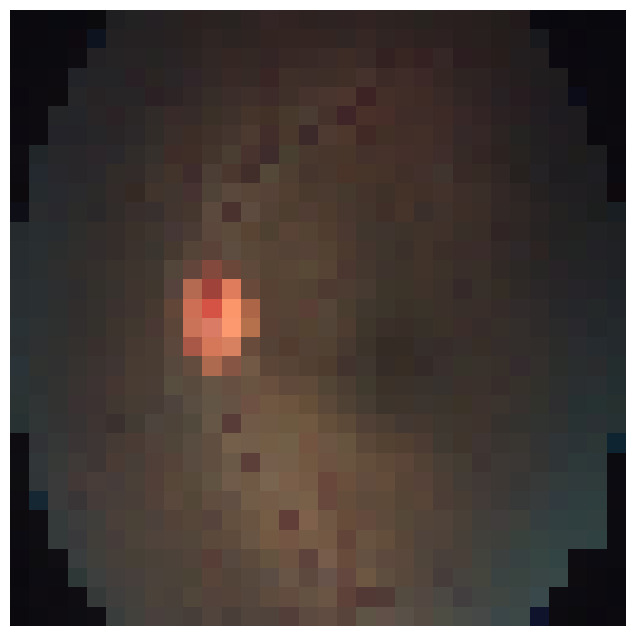

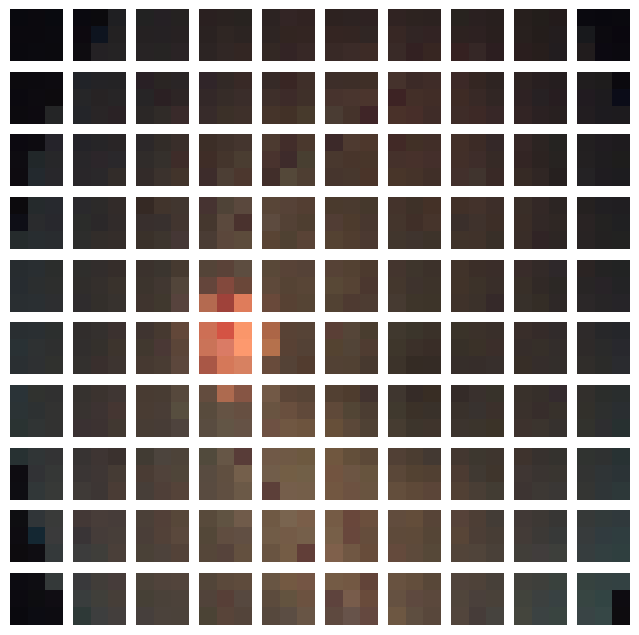

In [23]:
plt.figure(figsize=(8, 8))
image = next(iter(train_loader))[0][5]

plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)

print(resized_image.shape)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
#print(n)

plt.figure(figsize=(8, 8))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype('uint8'))
    plt.axis("off")

In [24]:
class CCTTokenizer(layers.Layer):
    def __init__(
        self,
        kernel_size=3,
        stride=1,
        padding=1,
        pooling_kernel_size=3,
        pooling_stride=2,
        num_conv_layers=conv_layers,
        num_output_channels=[64, 128],
        positional_emb=positional_emb,
        **kwargs,
    ):
        super().__init__(**kwargs)

        # This is our tokenizer.
        self.conv_model = keras.Sequential()
        for i in range(num_conv_layers):
            self.conv_model.add(
                layers.Conv2D(
                    num_output_channels[i],
                    kernel_size,
                    stride,
                    padding="valid",
                    use_bias=False,
                    activation="relu",
                    kernel_initializer="he_normal",
                )
            )
            self.conv_model.add(layers.ZeroPadding2D(padding))
            self.conv_model.add(
                layers.MaxPool2D(pooling_kernel_size, pooling_stride, "same")
            )

        self.positional_emb = positional_emb

    def call(self, images):
        outputs = self.conv_model(images)
        # After passing the images through our mini-network the spatial dimensions
        # are flattened to form sequences.
        reshaped = tf.reshape(
            outputs,
            (-1, tf.shape(outputs)[1] * tf.shape(outputs)[2], tf.shape(outputs)[-1]),
        )
        return reshaped

    def positional_embedding(self, image_size):
        # Positional embeddings are optional in CCT. Here, we calculate
        # the number of sequences and initialize an `Embedding` layer to
        # compute the positional embeddings later.
        if self.positional_emb:
            dummy_inputs = tf.ones((1, image_size, image_size, 3))
            dummy_outputs = self.call(dummy_inputs)
            sequence_length = tf.shape(dummy_outputs)[1]
            projection_dim = tf.shape(dummy_outputs)[-1]

            embed_layer = layers.Embedding(
                input_dim=sequence_length, output_dim=projection_dim
            )
            return embed_layer, sequence_length
        else:
            return None

In [25]:
# Referred from: github.com:rwightman/pytorch-image-models.
class StochasticDepth(layers.Layer):
    def __init__(self, drop_prop, **kwargs):
        super().__init__(**kwargs)
        self.drop_prob = drop_prop

    def call(self, x, training=None):
        if training:
            keep_prob = 1 - self.drop_prob
            shape = (tf.shape(x)[0],) + (1,) * (tf.shape(x).shape[0] - 1)
            random_tensor = keep_prob + tf.random.uniform(shape, 0, 1)
            random_tensor = tf.floor(random_tensor)
            return (x / keep_prob) * random_tensor
        return x

In [26]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [62]:
# Note the rescaling layer. These layers have pre-defined inference behavior.
image_size = 32  # Set the desired image size
data_augmentation = keras.Sequential(
    [
        layers.Rescaling(scale=1.0 / 255),
        layers.RandomCrop(image_size, image_size),
        layers.RandomFlip("horizontal"),
    ],
    name="data_augmentation",
)


In [66]:
# Example 1: Adding a Convolutional Layer
from tensorflow.keras.layers import Conv2D

# Add a convolutional layer after the data augmentation
x = Conv2D(64, (3, 3), activation='relu', padding='same')

In [28]:
def create_cct_model(
    image_size=image_size,
    input_shape=input_shape,
    num_heads=num_heads,
    projection_dim=projection_dim,
    transformer_units=transformer_units,
):
    inputs = layers.Input(input_shape)

    # Augment data.
    augmented = data_augmentation(inputs)

    # Encode patches.
    cct_tokenizer = CCTTokenizer()
    encoded_patches = cct_tokenizer(augmented)

    # Apply positional embedding.
    if positional_emb:
        pos_embed, seq_length = cct_tokenizer.positional_embedding(image_size)
        positions = tf.range(start=0, limit=seq_length, delta=1)
        position_embeddings = pos_embed(positions)
        encoded_patches += position_embeddings

    # Calculate Stochastic Depth probabilities.
    dpr = [x for x in np.linspace(0, stochastic_depth_rate, transformer_layers)]

    # Create multiple layers of the Transformer block.
    for i in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)

        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip connection 1.
        attention_output = StochasticDepth(dpr[i])(attention_output)
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-5)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        # Skip connection 2.
        x3 = StochasticDepth(dpr[i])(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Apply sequence pooling.
    representation = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)
    attention_weights = tf.nn.softmax(layers.Dense(1)(representation), axis=1)
    weighted_representation = tf.matmul(
        attention_weights, representation, transpose_a=True
    )
    weighted_representation = tf.squeeze(weighted_representation, -2)

    # Classify outputs.
    logits = layers.Dense(num_classes)(weighted_representation)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [29]:
def experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )
    
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
            keras.metrics.AUC( name="AUC"),
        ],
     )
    checkpoint_filepath = "./tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(train_loader ,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=test_loader,
                        callbacks=[checkpoint_callback],)
    model.load_weights(checkpoint_filepath)
    _, accuracy, auc = model.evaluate(test_loader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test AUC: {round(auc * 100, 2)}%")

    return history

In [68]:
cct_classifier=create_cct_model()
cct_classifier.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 32, 32, 3)   0           ['input_3[0][0]']                
                                                                                                  
 cct_tokenizer_2 (CCTTokenizer)  (None, 64, 128)     75456       ['data_augmentation[1][0]']      
                                                                                                  
 tf.__operators__.add_2 (TFOpLa  (None, 64, 128)     0           ['cct_tokenizer_2[0][0]']        
 mbda)                                                                                     

In [31]:
history = experiment(cct_classifier)

Epoch 1/100
20/20 [==============================] - 226s 11s/step - loss: 1.5338 - accuracy: 0.4444 - AUC: 0.7001 - val_loss: 1.2820 - val_accuracy: 0.4888 - val_AUC: 0.7632
Epoch 2/100
20/20 [==============================] - 209s 11s/step - loss: 1.1803 - accuracy: 0.5214 - AUC: 0.7143 - val_loss: 0.9914 - val_accuracy: 0.6352 - val_AUC: 0.7215
Epoch 3/100
20/20 [==============================] - 202s 10s/step - loss: 0.8953 - accuracy: 0.6722 - AUC: 0.7950 - val_loss: 0.8881 - val_accuracy: 0.6890 - val_AUC: 0.7709
Epoch 4/100
20/20 [==============================] - 197s 10s/step - loss: 0.7996 - accuracy: 0.7122 - AUC: 0.8415 - val_loss: 0.8510 - val_accuracy: 0.6907 - val_AUC: 0.8308
Epoch 5/100
20/20 [==============================] - 191s 10s/step - loss: 0.7915 - accuracy: 0.7089 - AUC: 0.8499 - val_loss: 0.8553 - val_accuracy: 0.7072 - val_AUC: 0.8238
Epoch 6/100
20/20 [==============================] - 206s 10s/step - loss: 0.7613 - accuracy: 0.7203 - AUC: 0.8493 - val_loss

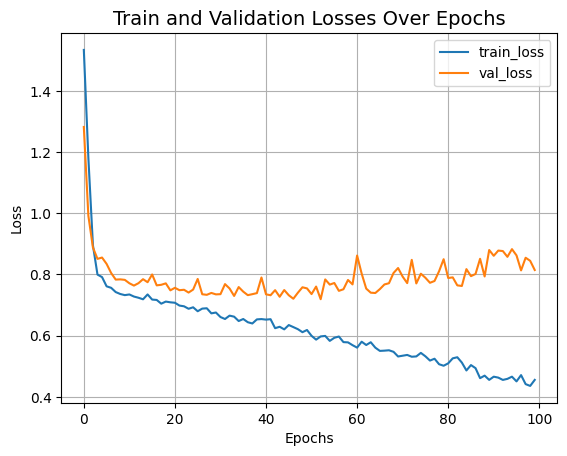

In [32]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

dict_keys(['loss', 'accuracy', 'AUC', 'val_loss', 'val_accuracy', 'val_AUC'])


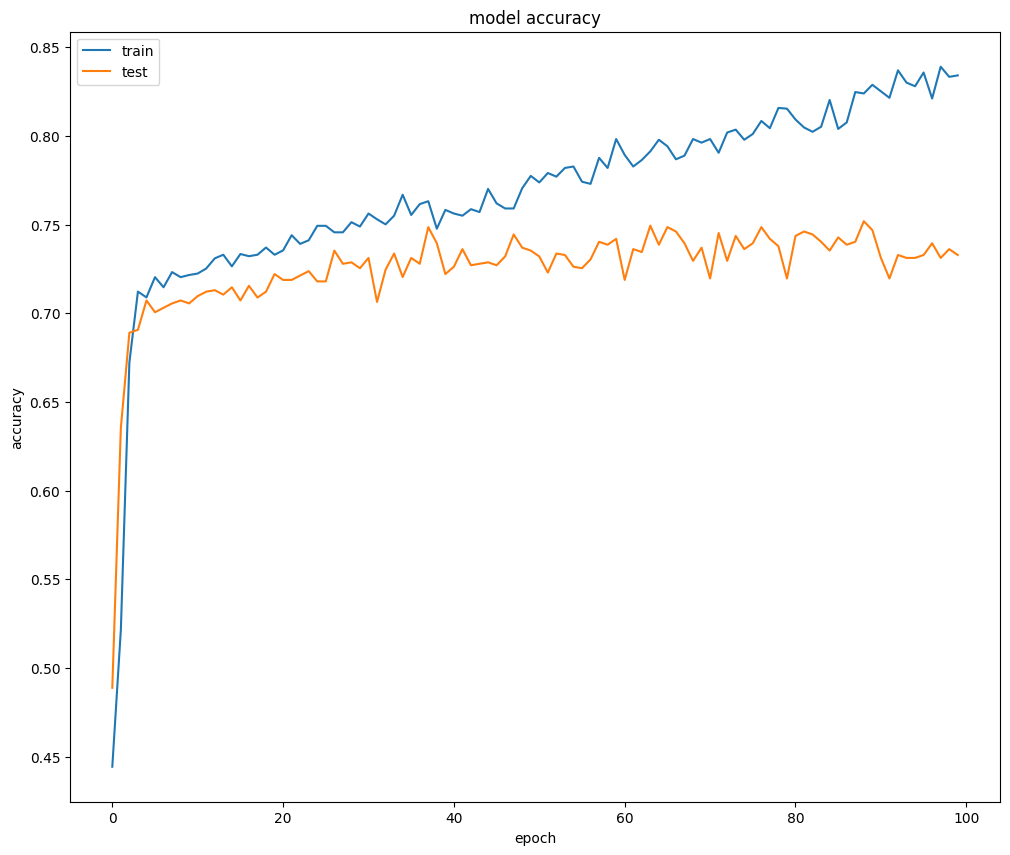

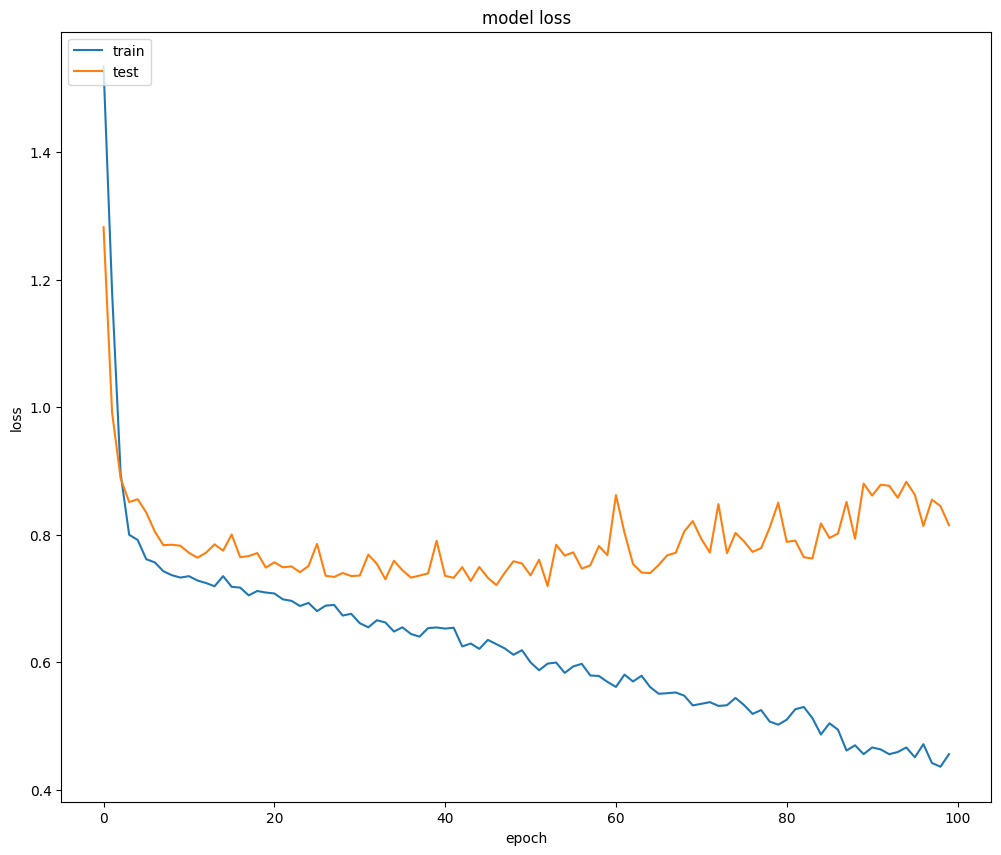

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
cct_classifier.load_weights("./tmp/checkpoint")

In [36]:
def get_img_array(img):
    
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [37]:
def gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.input], [model.get_layer(last_conv_layer_name).output,  model.output]
    )
    
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
        # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [38]:
classes.values()

dict_values(['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative'])

In [39]:
def display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4, preds=[0,0,0,0,0], plot=None):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    #superimposed_img.save(cam_path)

    # Display Grad CAM
    plot.imshow(superimposed_img)
    plot.set(title =
        " No DR: \
        {:.3f}\nMild: \
        {:.3f}\nModerate: \
        {:.3f}\nSevere: \
        {:.3f}\nProliferative: \
        {:.3f}".format(preds[0], \
                    preds[1], \
                    preds[2], \
                    preds[3],
                    preds[4])
    )
    plot.axis('off')

In [73]:
# As in layer_normalization (LayerNorma (None, 1296, 64) ) 
#the last dim is 1296 so 36x36 for heatmap
np.sqrt(1296)

36.0

1/1 [==============================] - 0s 31ms/step
Predicted:
No DR:     -2.3629939556121826
Mild: 2.2314953804016113
Moderate:     -1.3096951246261597
Severe:     2.4134044647216797
Proliferative: -2.068988084793091


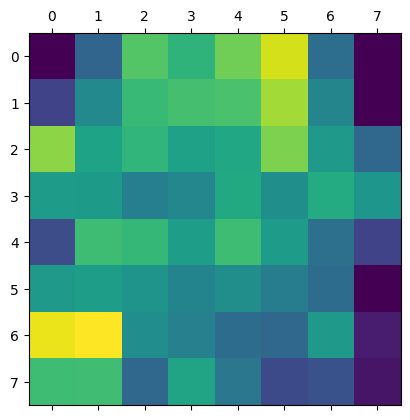

In [77]:
test_image = next(iter(test_loader))[0][5]
# Prepare image
img_array =get_img_array(test_image)

last_conv_layer_name = 'cct_tokenizer_2'
# Remove last layer's softmax
cct_classifier.layers[-1].activation = None
# Print what the top predicted class is
preds = cct_classifier.predict(img_array)
print("Predicted:\n" + "No DR: \
    {p1}\nMild: {p2}\nModerate: \
    {p3}\nSevere: \
    {p4}\nProliferative: {p5}".format(p1=preds[0][0], \
                                            p2=preds[0][1],p3=preds[0][2],p4=preds[0][3],p5=preds[0][4]))
# Generate class activation heatmap
heatmap = gradcam_heatmap(img_array, cct_classifier, last_conv_layer_name)
heatmap = np.reshape(heatmap, (8, 8))

# Display heatmap
plt.matshow(heatmap)

plt.show()

1/1 [==============================] - 0s 62ms/step


/tmp/ipykernel_32/4135188422.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


1/1 [==============================] - 0s 54ms/step


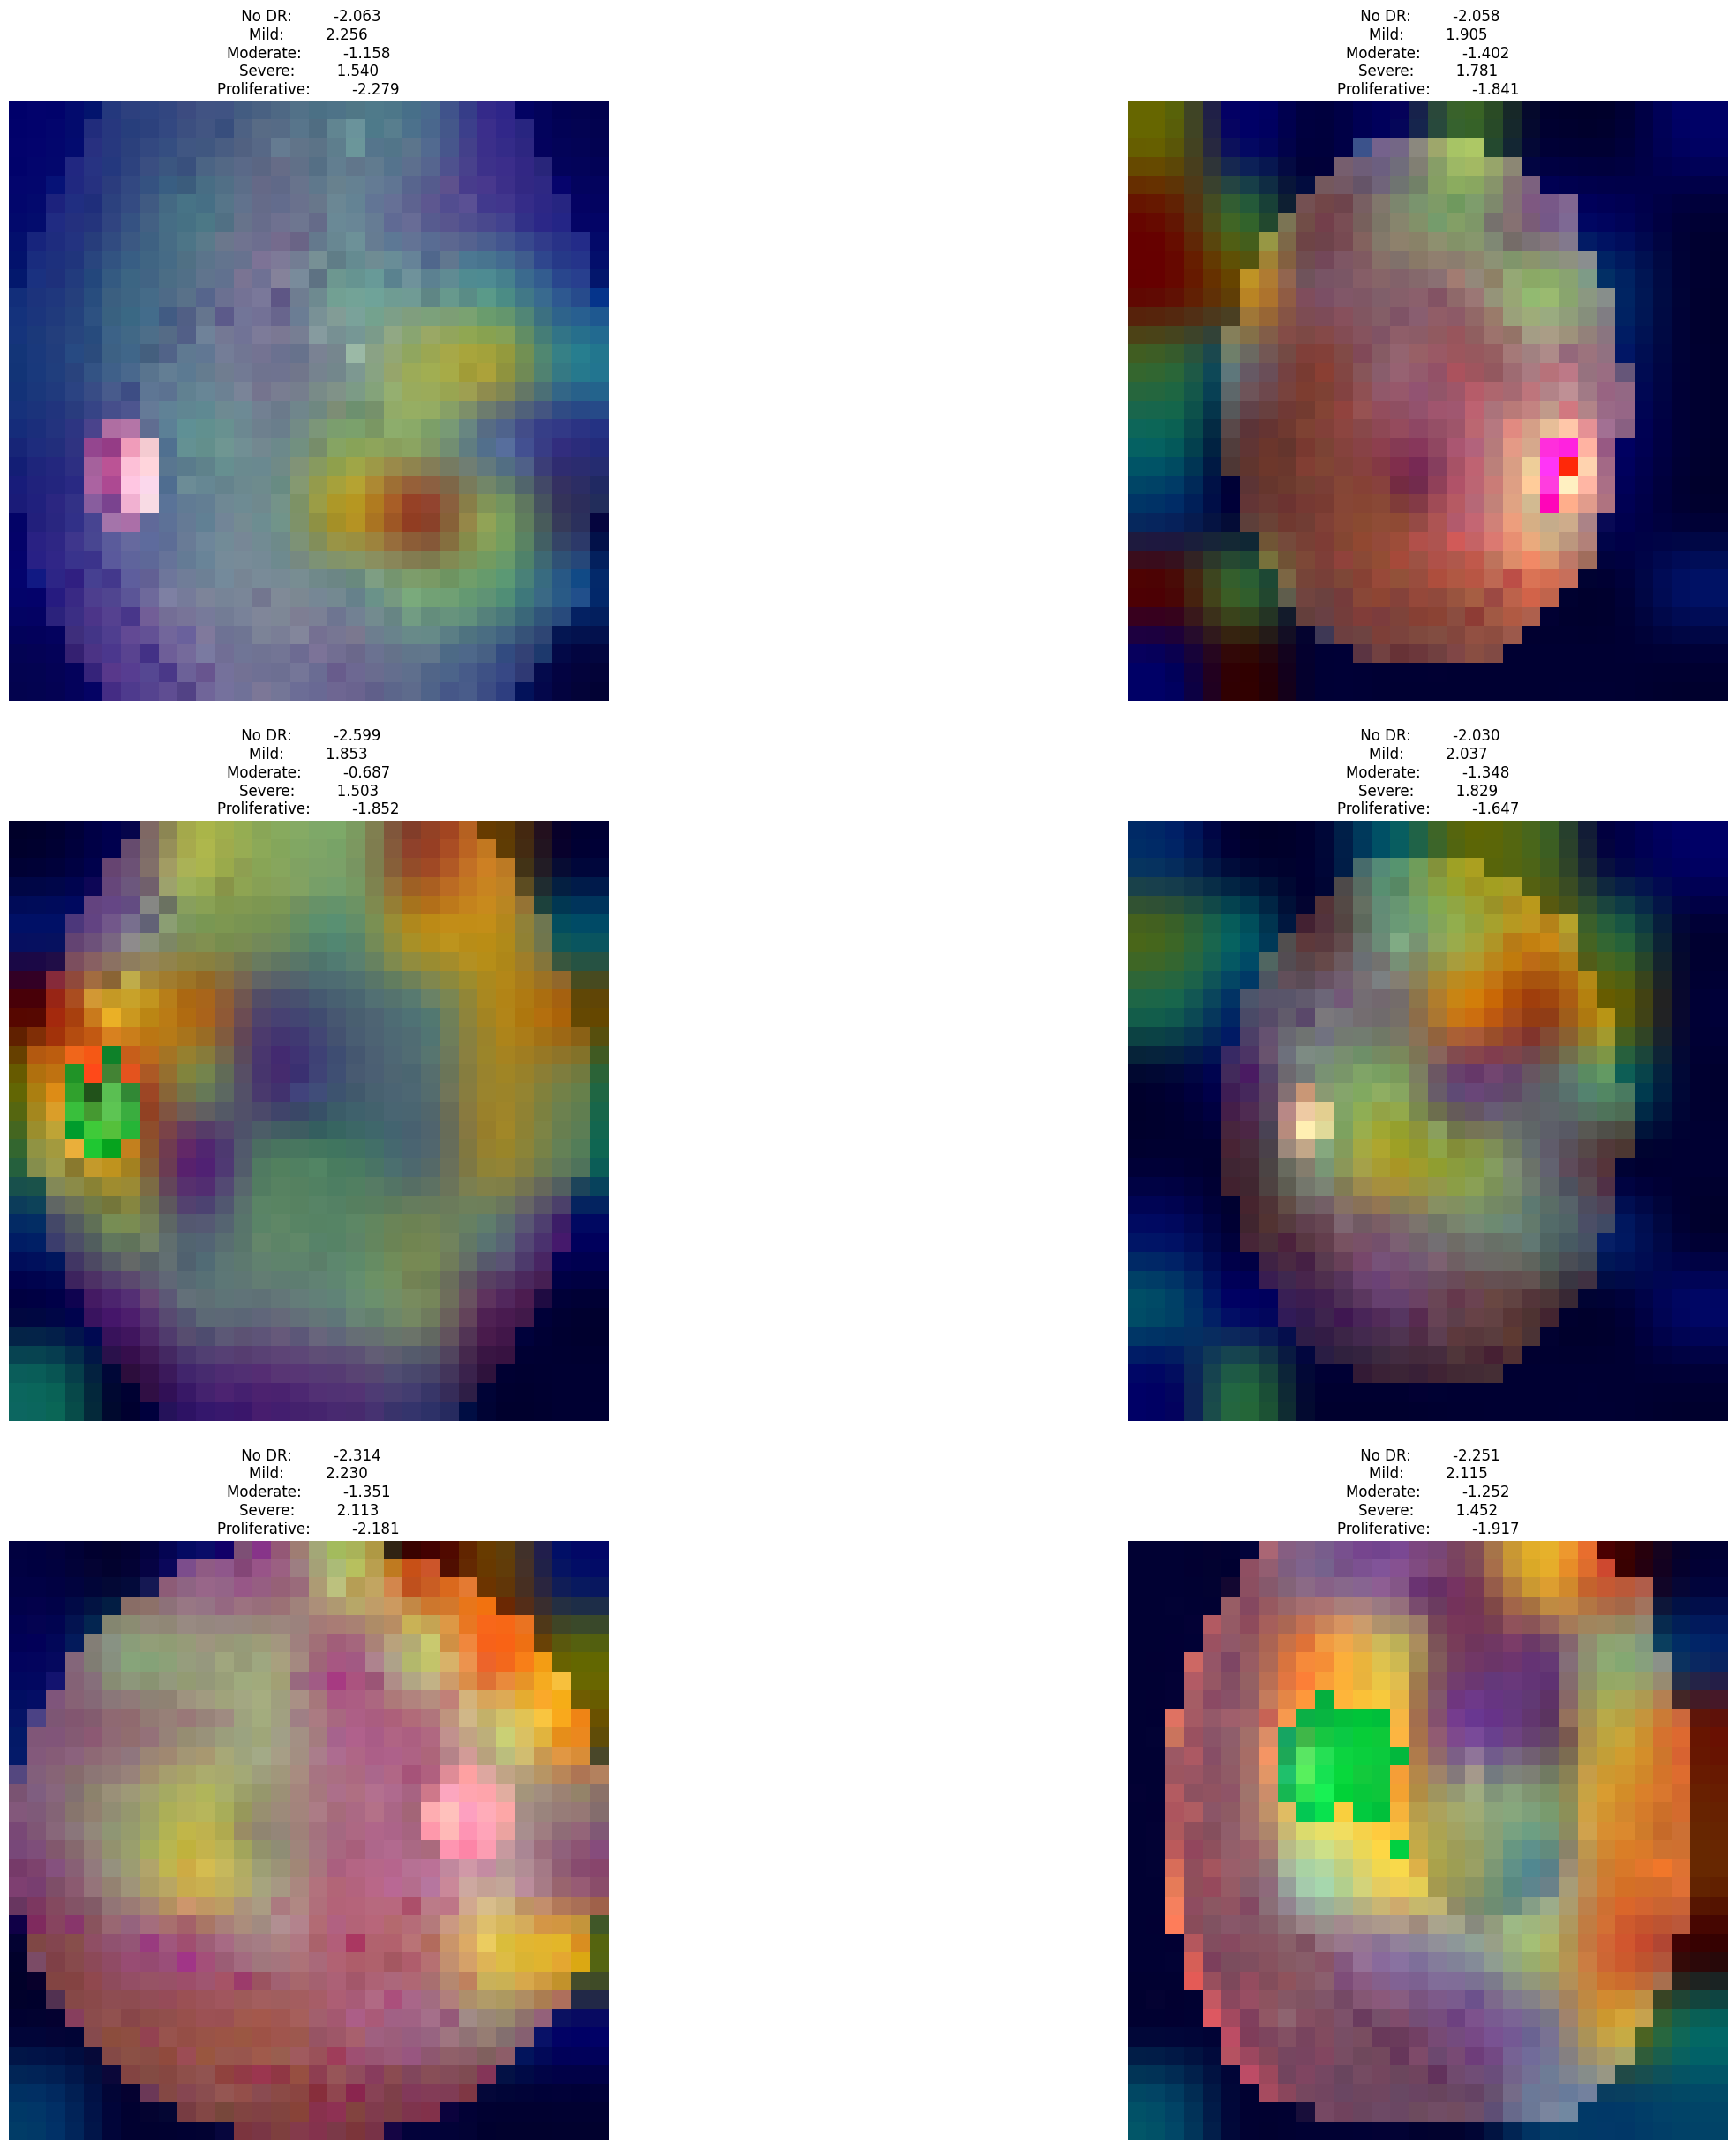

In [80]:
fig, axis = plt.subplots(3, 2, figsize=(30, 30))
for images, ax in zip(next(iter(test_loader))[0][:6], axis.flat):
    img_array = get_img_array(images)
    # Remove last layer's softmax
    cct_classifier.layers[-1].activation = None
    # Print what the top predicted class is
    preds = cct_classifier.predict(img_array)
    heatmap = gradcam_heatmap(img_array, cct_classifier, last_conv_layer_name)

    heatmap = np.reshape(heatmap, (8,8))
    display_gradcam(images, heatmap, preds=preds[0], plot=ax)

1/1 [==============================] - 0s 38ms/step


/tmp/ipykernel_32/4135188422.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


1/1 [==============================] - 0s 42ms/step


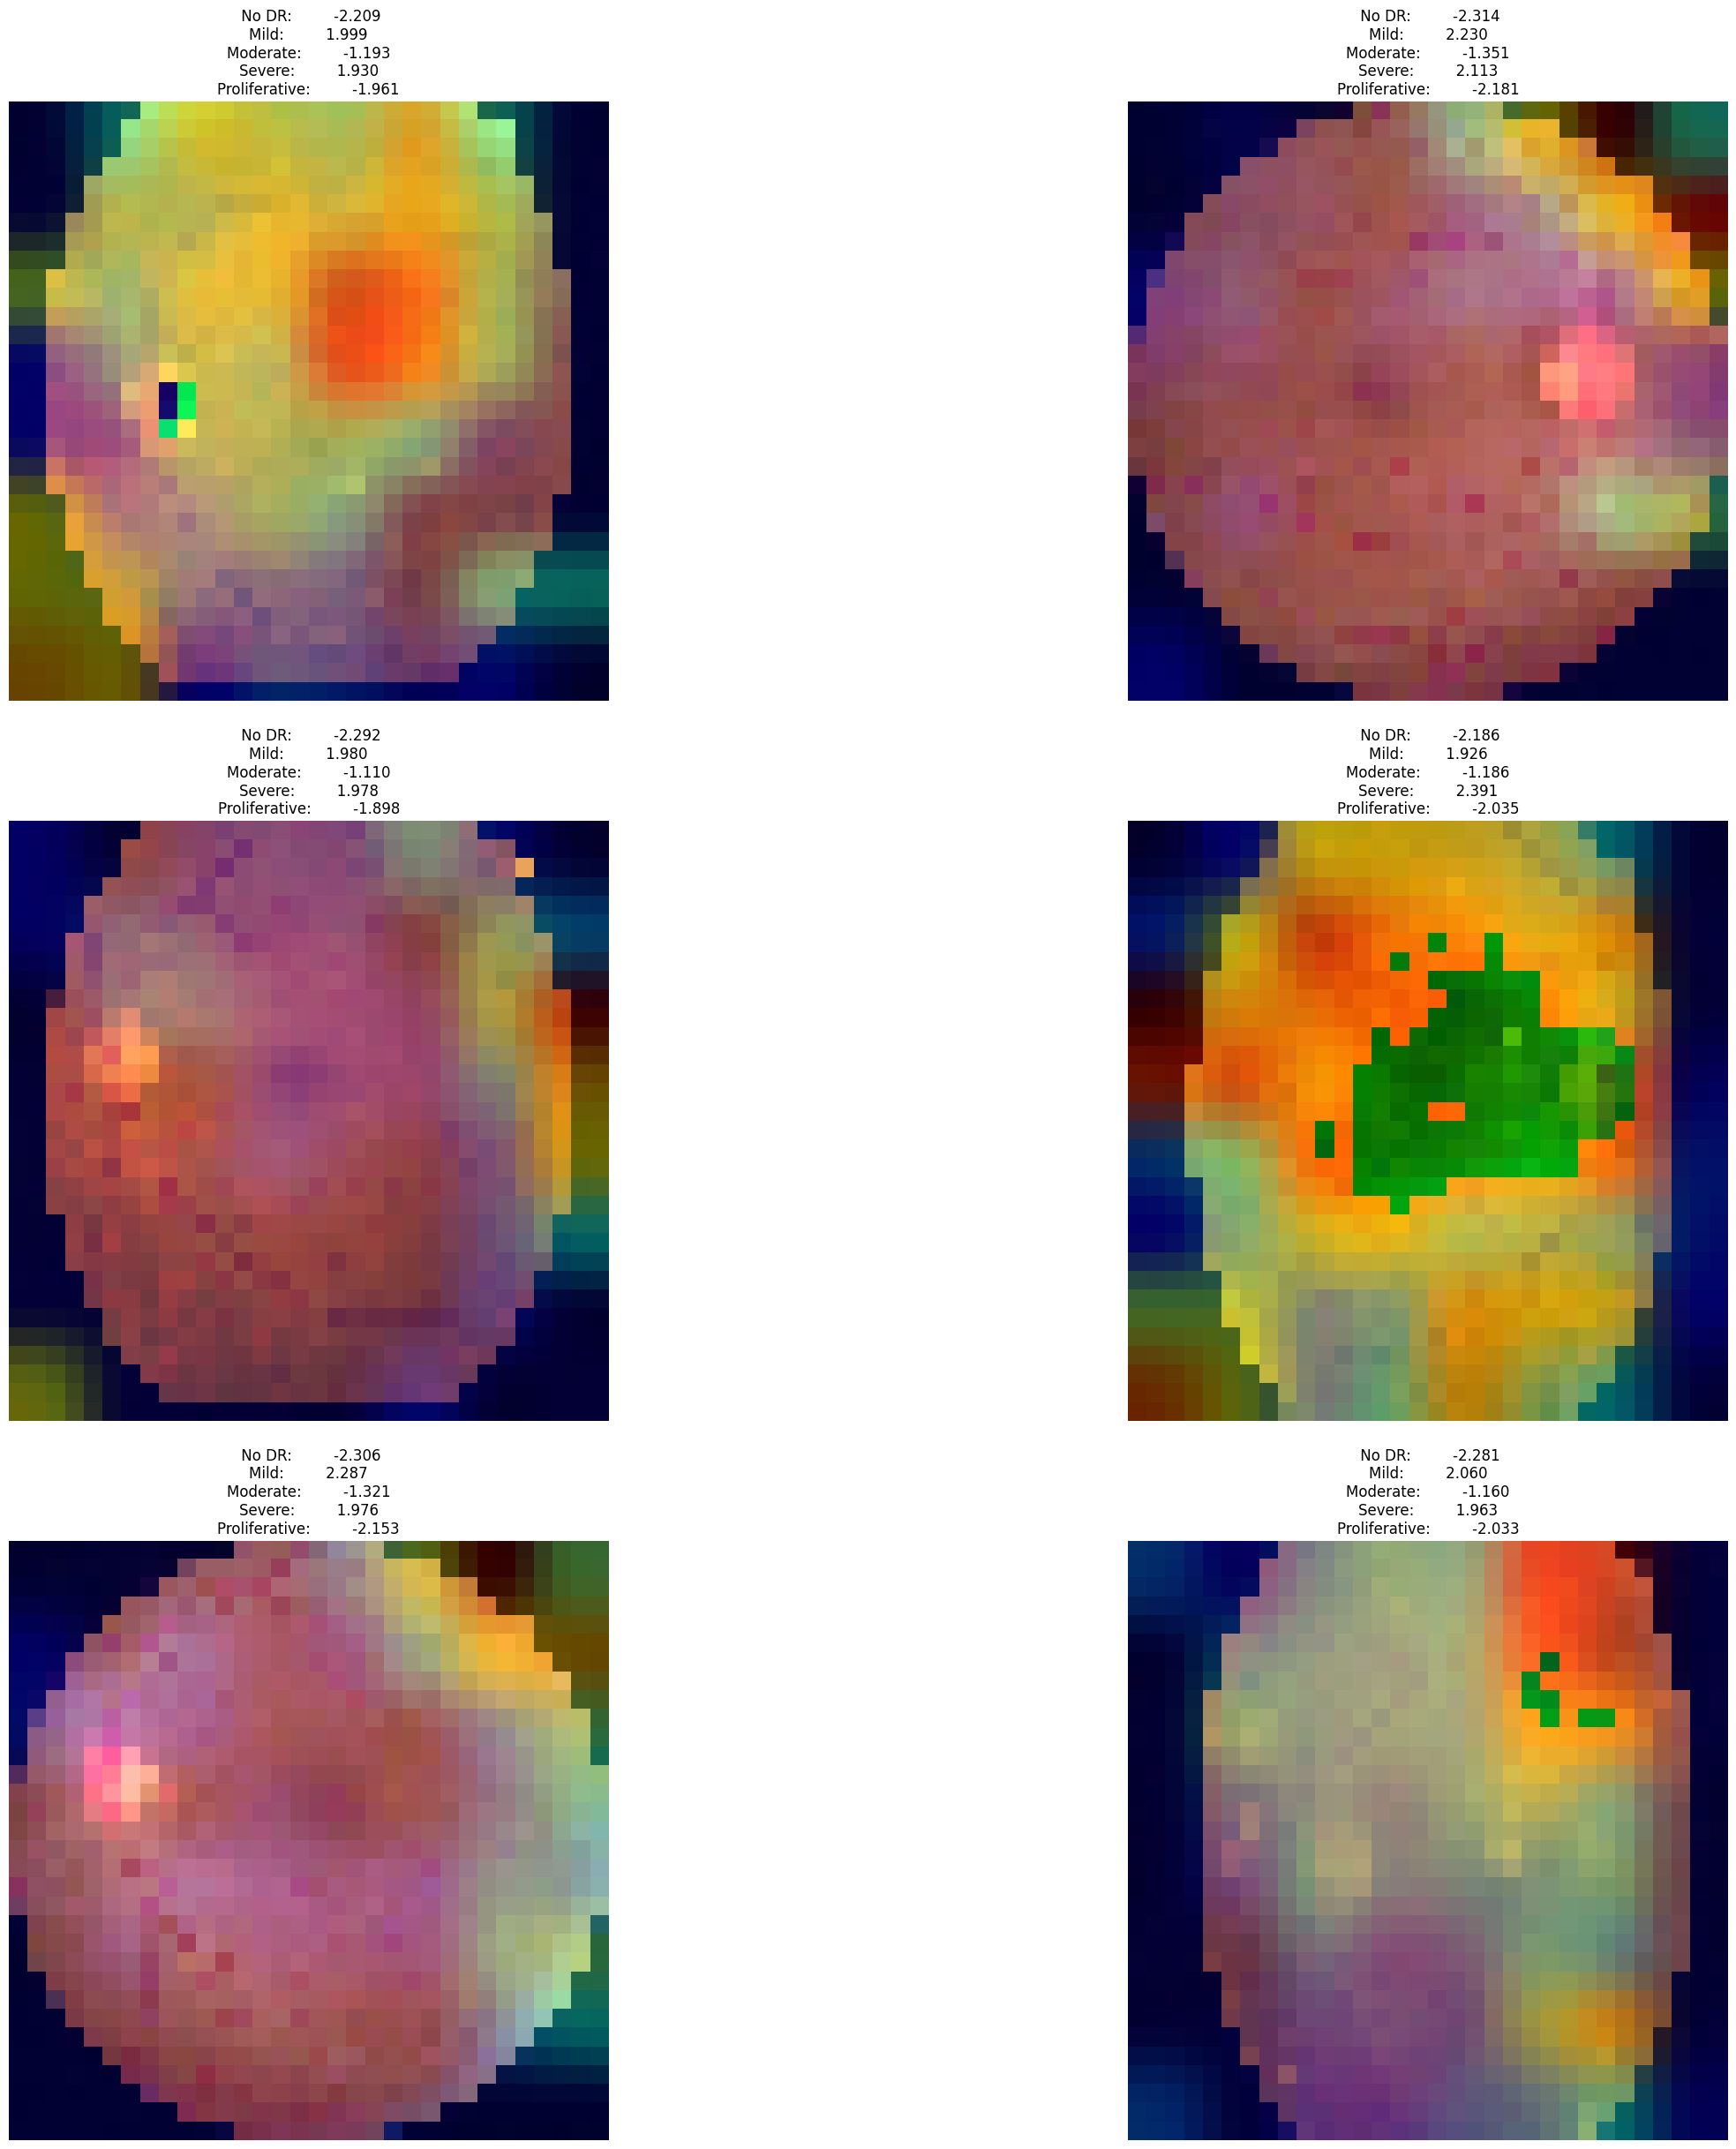

In [83]:
fig, axis = plt.subplots(3, 2, figsize=(30, 30))
for images, ax in zip(next(iter(test_loader))[0][6:12], axis.flat):
    img_array = get_img_array(images)
    # Remove last layer's softmax
    cct_classifier.layers[-1].activation = None
    # Print what the top predicted class is
    preds = cct_classifier.predict(img_array)
    heatmap = gradcam_heatmap(img_array, cct_classifier, last_conv_layer_name)

    heatmap = np.reshape(heatmap, (8,8))
    display_gradcam(images, heatmap, preds=preds[0], plot=ax)